# Global View Example Notebook

Large parts of this notebook are directly taken from this [tutorial](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-machine-learning-preprocessing.html) from the Lighkurve website; and the tutorial itself is inspired by this [paper](https://arxiv.org/pdf/1712.05044.pdf). 

### 1.Imports

In [17]:
import lightkurve as lk
import numpy as np

### 2. Downloading the specific lightcurve and Creating the Relevant Data

*   List item
*   List item



In [18]:
lcs = lk.search_lightcurve('KIC 757450', author='Kepler', cadence='long').download_all()

note: in the next cell, these values are not arbitrary, on the contrary they are stellar parameters for the specific star (and so will be different from star to star). These are found from the Kepler Cumulative Table

In [19]:
period, t0, duration_hours = 8.88492, 134.452, 2.078

note: the lcs.stitch() performs stitching of all the quarters of data so that it becomes a single long time-series instead of segregated quarters of data

### 3. Processing

In [20]:
lc_raw = lcs.stitch()
lc_raw.flux.shape

(65031,)

note: here we remove the outliers with specific criteria

In [21]:
lc_clean = lc_raw.remove_outliers(sigma=20, sigma_upper=4)

from the tutorial: "We have to mask the transit to avoid self-subtraction the genuine planet signal when we flatten the lightcurve. We have to do a hack to find where the time series should be masked."

In [22]:
temp_fold = lc_clean.fold(period, epoch_time=t0)
fractional_duration = (duration_hours / 24.0) / period
phase_mask = np.abs(temp_fold.phase.value) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc_clean.time.value, temp_fold.time_original.value[phase_mask])

from the tutorial: "Now flatten the mask, but interpolate the trend over the points possessing the transit signal of interest."

In [23]:
lc_flat, trend_lc = lc_clean.flatten(return_trend=True, mask=transit_mask)

note: now we are folding the lightcurve around a specific period with a give epoch

In [24]:
lc_fold = lc_flat.fold(period, epoch_time=t0)

In [25]:
lc_global = lc_fold.bin(time_bin_size=0.005).normalize() - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1
lc_global.flux.shape

(1777,)

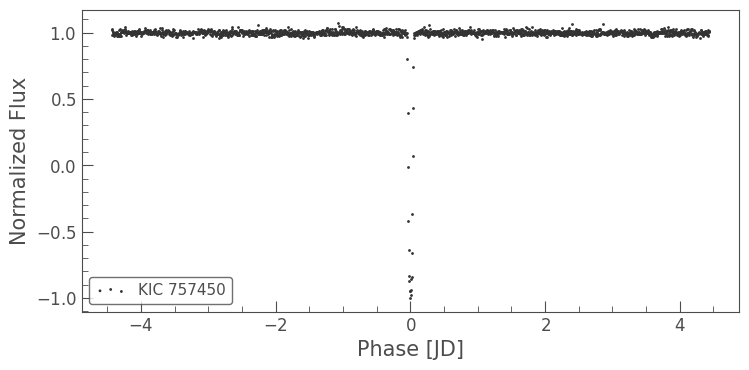

In [26]:
lc_global.scatter();

### 4. Key Takeaways

Here we can see we have a nicely defined drop in the light flux, however there are still a few problems with this curve: each curve will not have the same amount of data points; we will show how to deal with this in the following notebook